In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_excel('/content/drive/My Drive/pvd/PriceMinute.xlsx',names=['Date','Hour','Time Block','A1','A2','E1','E2','N1','N2','N3','S1','S2','S3','W1','W2','W3','MCP'])

data= data[3:]
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)
data= data[:768]

data.fillna(method='ffill',inplace=True)

In [56]:
data

,Date,Hour,Time Block,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,MCP
0,13-11-2020,1,00:00 - 00:15,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45,2300.45
1,13-11-2020,1,00:15 - 00:30,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06,2399.06
2,13-11-2020,1,00:30 - 00:45,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32,2399.32
3,13-11-2020,1,00:45 - 01:00,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02,2399.02
4,13-11-2020,2,01:00 - 01:15,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37,2299.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,20-11-2020,23,22:45 - 23:00,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32,2649.32
764,20-11-2020,24,23:00 - 23:15,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38,2535.38
765,20-11-2020,24,23:15 - 23:30,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62,2533.62
766,20-11-2020,24,23:30 - 23:45,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33,2500.33


### To check Numeric columns are identical to other or not.

In [4]:
not_same=[]

for i in range(len(data)):
  row=list(data.loc[i])[3:]
  result = all(element == row[0] for element in row)
  if (result!=True):
    not_same.append(i)
if len(not_same)==0:
  print('All other column prices are same as MCP Column')  

All other column prices are same as MCP Column


### Consider only unique features from existing dataframe 

In [5]:
data.drop(['A1','A2','E1','E2','N1','N2','N3','S1','S2','S3','W1','W2','W3'],axis=1,inplace=True)
data['date']=pd.to_datetime(data['Date'],errors ='ignore')
data.drop(['Date'], axis=1, inplace=True)
data['MCP'] = data['MCP'].astype(float)

# Data Visualization

### Summary Statistics

In [6]:
data.head(4)

,Hour,Time Block,MCP,date
0,1,00:00 - 00:15,2300.45,2020-11-13
1,1,00:15 - 00:30,2399.06,2020-11-13
2,1,00:30 - 00:45,2399.32,2020-11-13
3,1,00:45 - 01:00,2399.02,2020-11-13


In [35]:
print("Shape of Dataframe :",data.shape)

Shape of Dataframe : (768, 4)


In [61]:
data.describe()

,Hour,MCP
count,768.000000,768.000000
mean,12.500000,2592.711549
std,6.926698,513.240307
min,1.000000,999.780000
25%,6.750000,2260.715000
50%,12.500000,2450.805000
75%,18.250000,2899.172500
max,24.000000,6000.190000


### Density Plot

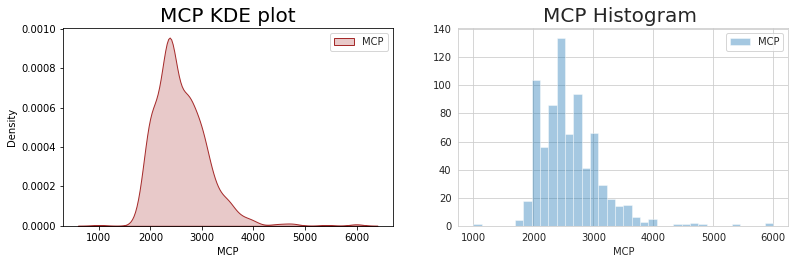

In [9]:
plt.figure(figsize=(13,8))
  
plt.subplot(2,2,1)
sns.set_style('whitegrid')
plt.title('MCP KDE plot',size=20)  
sns.kdeplot(data=data,x='MCP',color='brown',shade=True,label='MCP')
plt.legend(loc=1)

plt.subplot(2,2,2)
sns.set_style('whitegrid')
plt.title('MCP Histogram ',size=20)  
sns.distplot(data['MCP'],kde=False,label='MCP')
plt.legend(loc=1)

### Line Plot

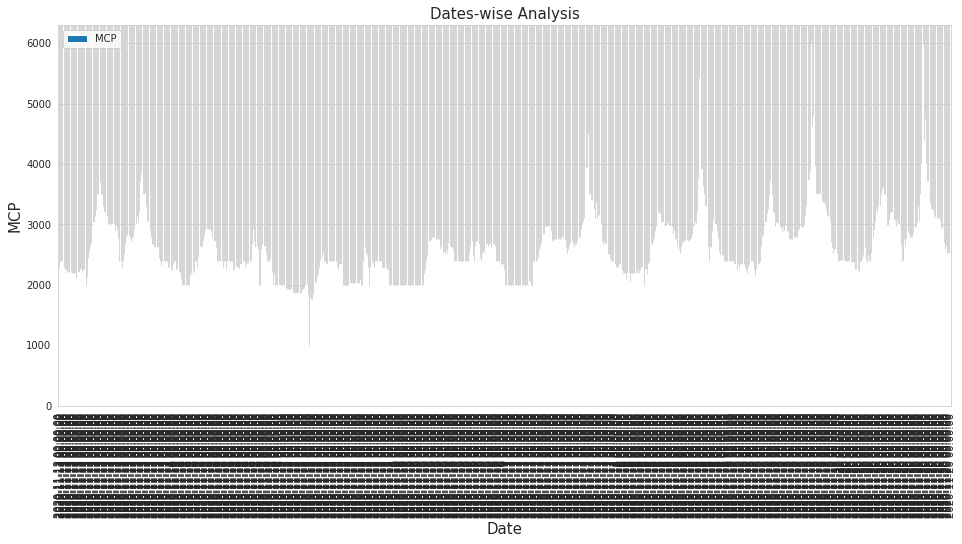

In [95]:
data.plot(x='date',y='MCP',rot='90',kind='bar',figsize=(16,7))

plt.title("Dates-wise Analysis",fontsize=15)
plt.xlabel('Date',fontsize=15) 
plt.ylabel('MCP',fontsize=15) 
plt.show()

Observation:

1)There are relatively not very large fluctuations from day to day, up and down.

2) Prices are relatively higher in last 4 days from 17/11/2020 to 20/11/2020.

### Box and Whisker Plots

In [61]:
groups = data.groupby('date')
dates=[]
Days = pd.DataFrame()
for name, group in groups:
  dates.append(str(name)[:10])
  Days[str(name)[:10]] = group['MCP'].values

Text(0, 0.5, 'MCP')

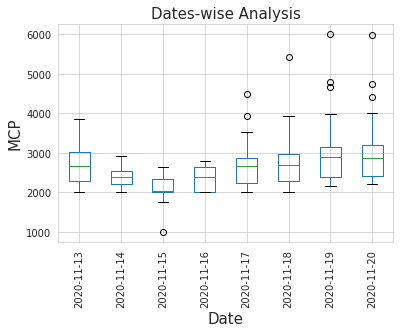

In [92]:
Days.boxplot(rot='90')
plt.title("Dates-wise Analysis",fontsize=15)
plt.xlabel('Date',fontsize=15) 
plt.ylabel('MCP',fontsize=15) 

Text(0, 0.5, 'MCP')

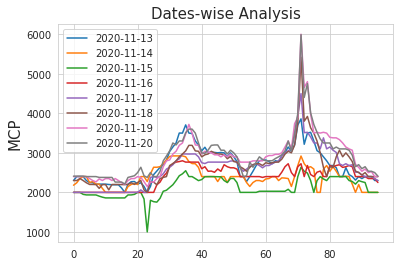

In [93]:
Days.plot()
plt.title("Dates-wise Analysis",fontsize=15)
plt.ylabel('MCP',fontsize=15) 

### Hourwise Analysis 

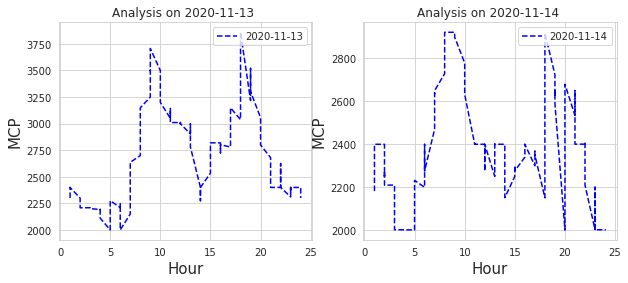

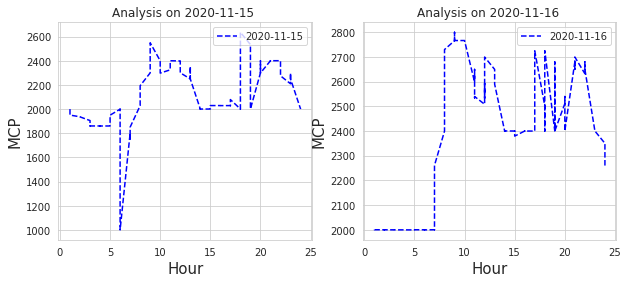

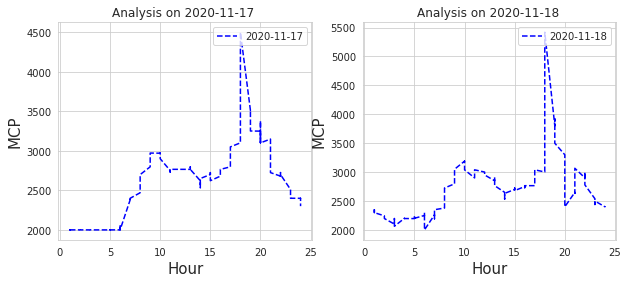

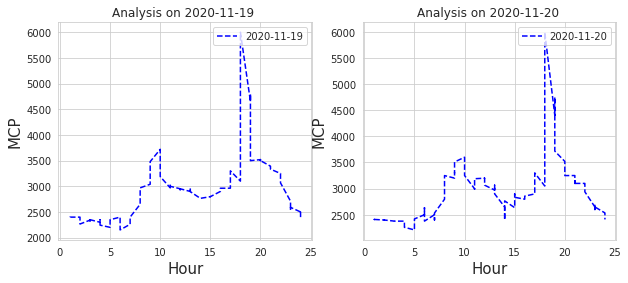

In [106]:
i=0
while i!=8:
  plt.figure(figsize=(10,4))
  
  plt.subplot(1,2,1)
  sns.set_style('whitegrid')
  plt.title("Analysis on {0} ".format(dates[i]))
  Hour=data.loc[data.date==dates[i],'Hour']
  MCP=data.loc[data.date==dates[i],'MCP']

  plt.plot(Hour,MCP,'b--',label=dates[i])
  plt.xlabel('Hour',fontsize=15) 
  plt.ylabel('MCP',fontsize=15) 
  plt.legend(loc=1)
  i=i+1

  plt.subplot(1,2,2)
  sns.set_style('whitegrid')
  plt.title("Analysis on {0} ".format(dates[i]))
  Hour=data.loc[data.date==dates[i],'Hour']
  MCP=data.loc[data.date==dates[i],'MCP']
  plt.plot(Hour,MCP,'b--',label=dates[i])
  plt.xlabel('Hour',fontsize=15) 
  plt.ylabel('MCP',fontsize=15) 
  plt.legend(loc=1)
  i=i+1

### Time block feature analysis

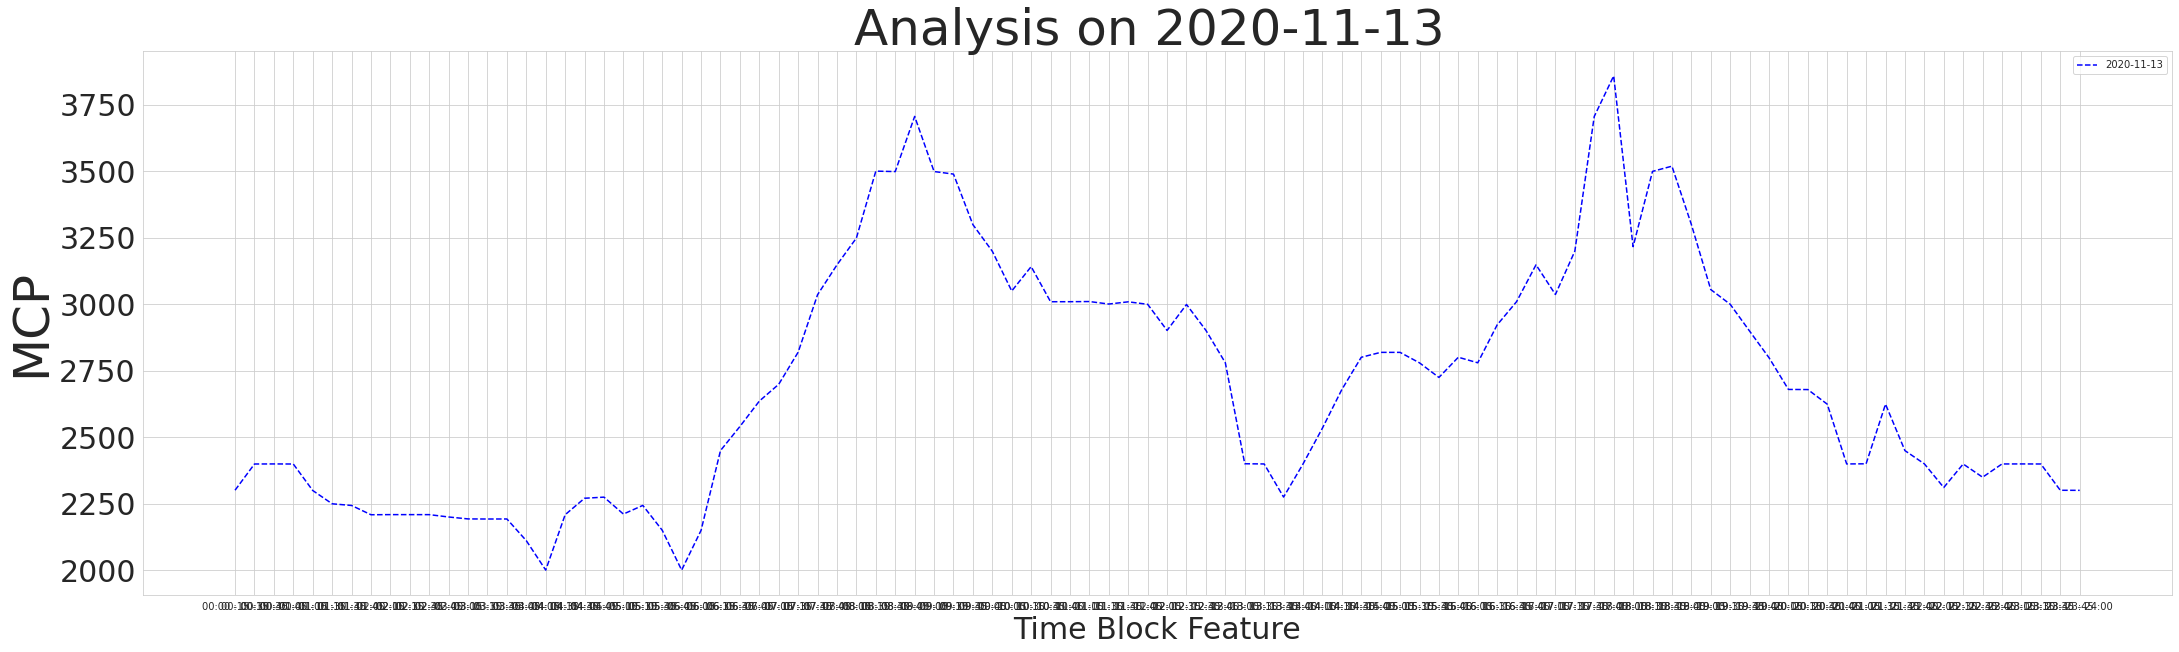

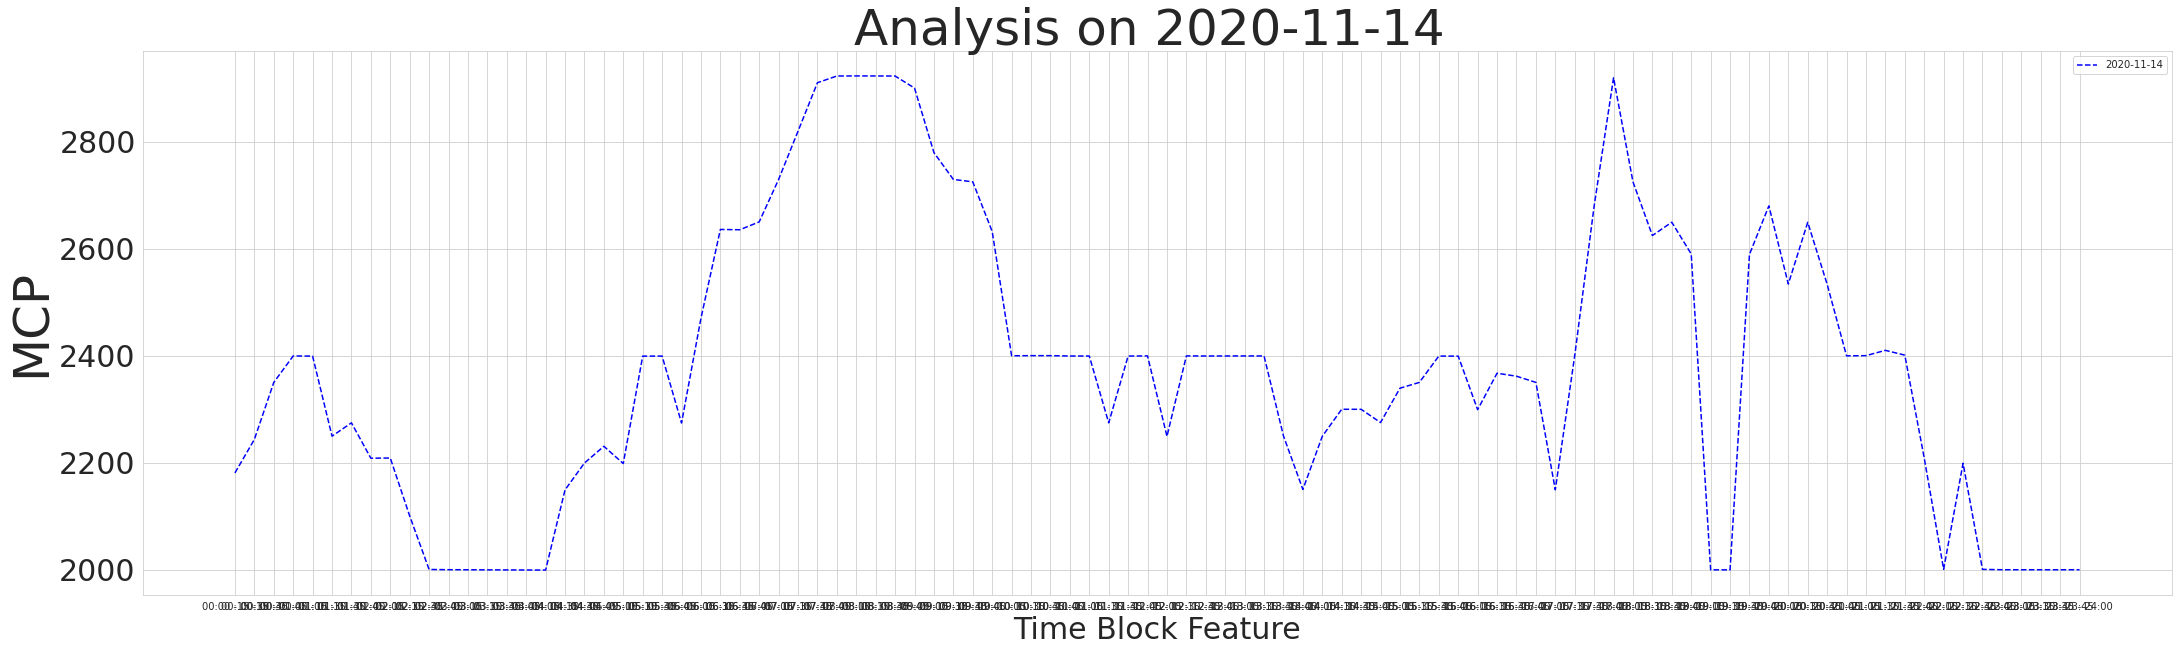

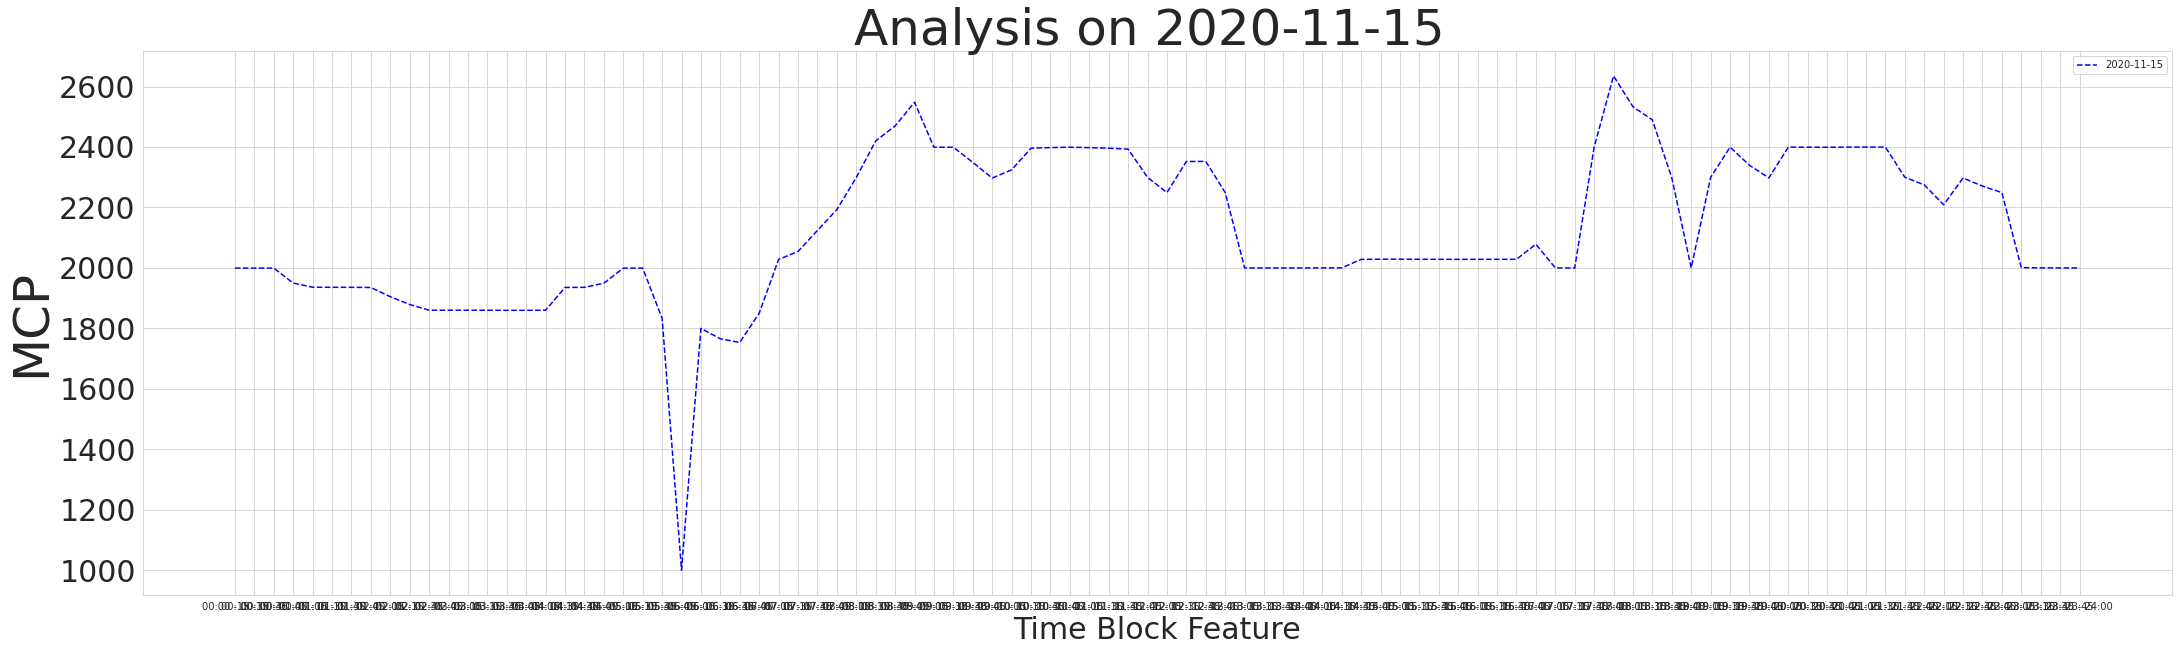

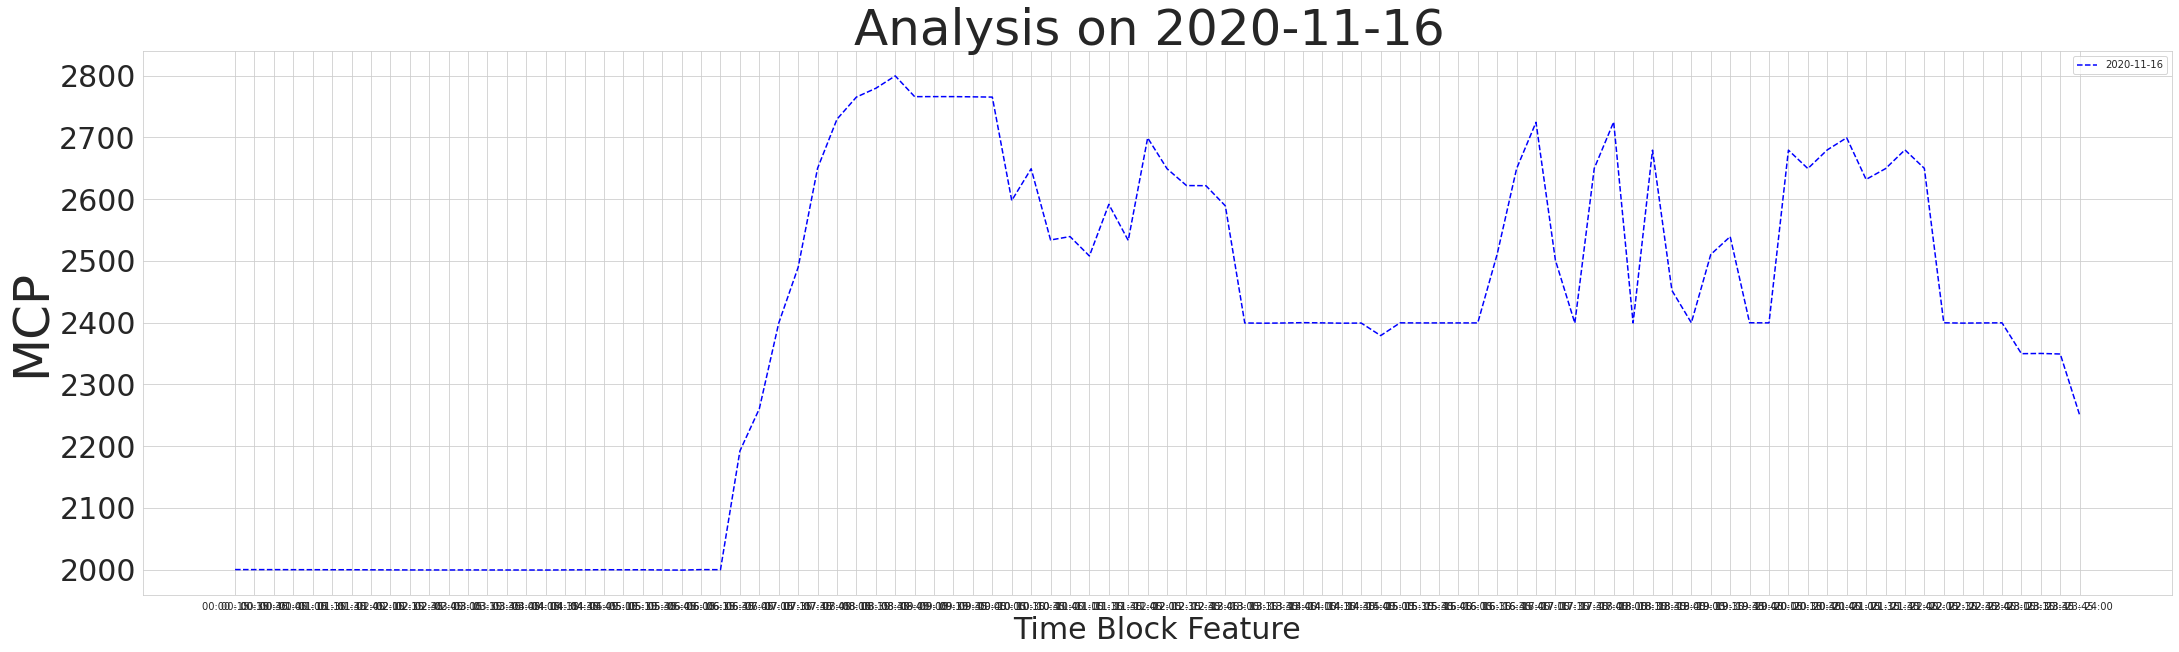

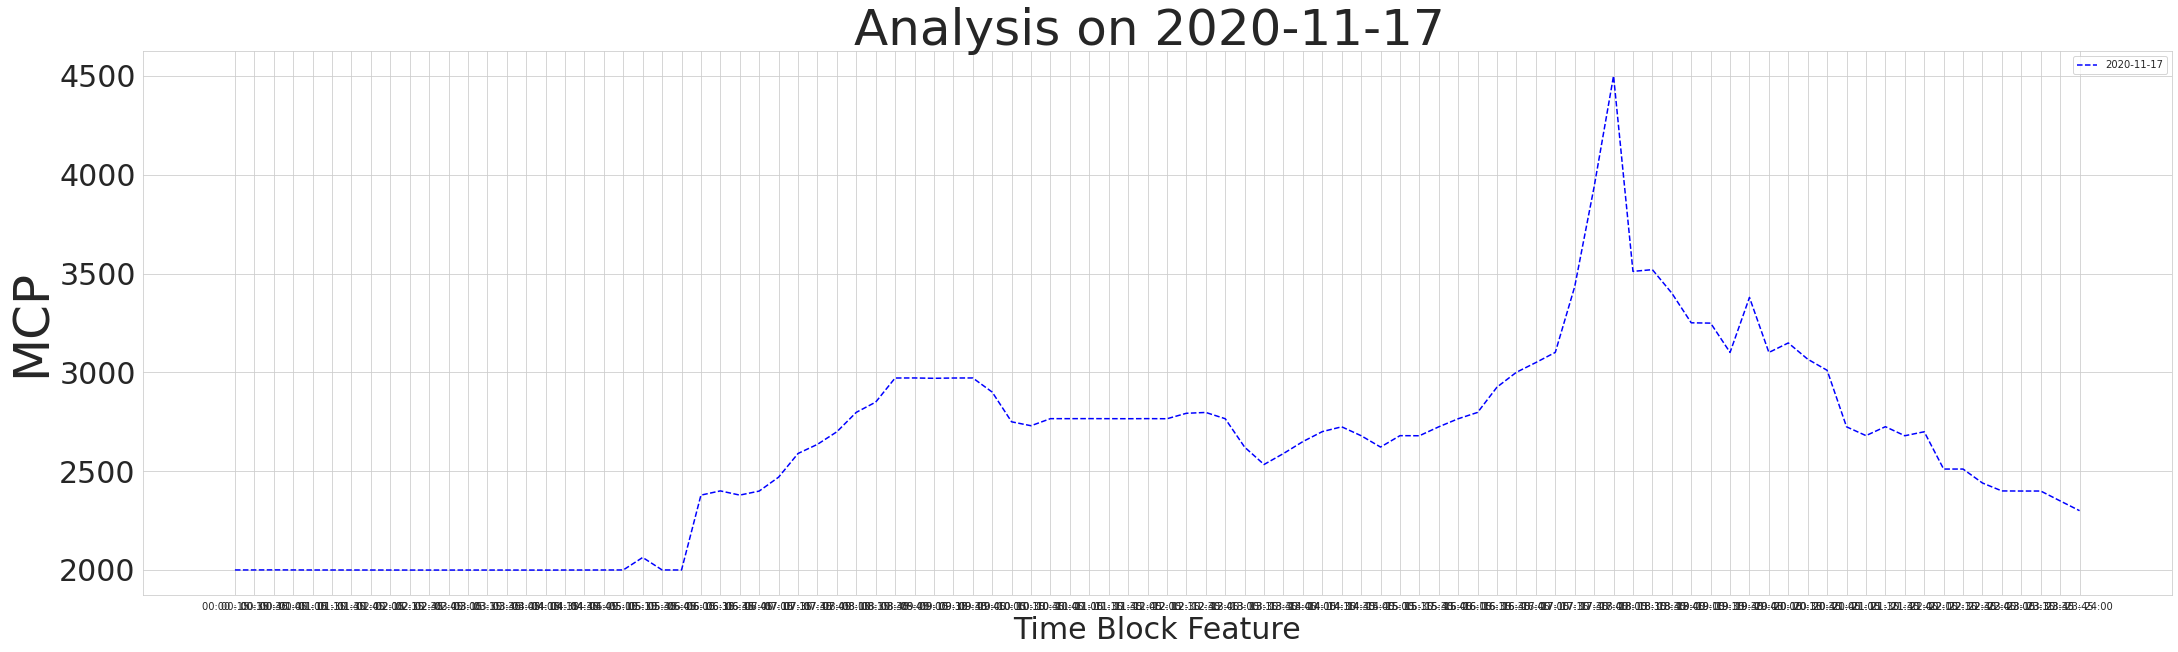

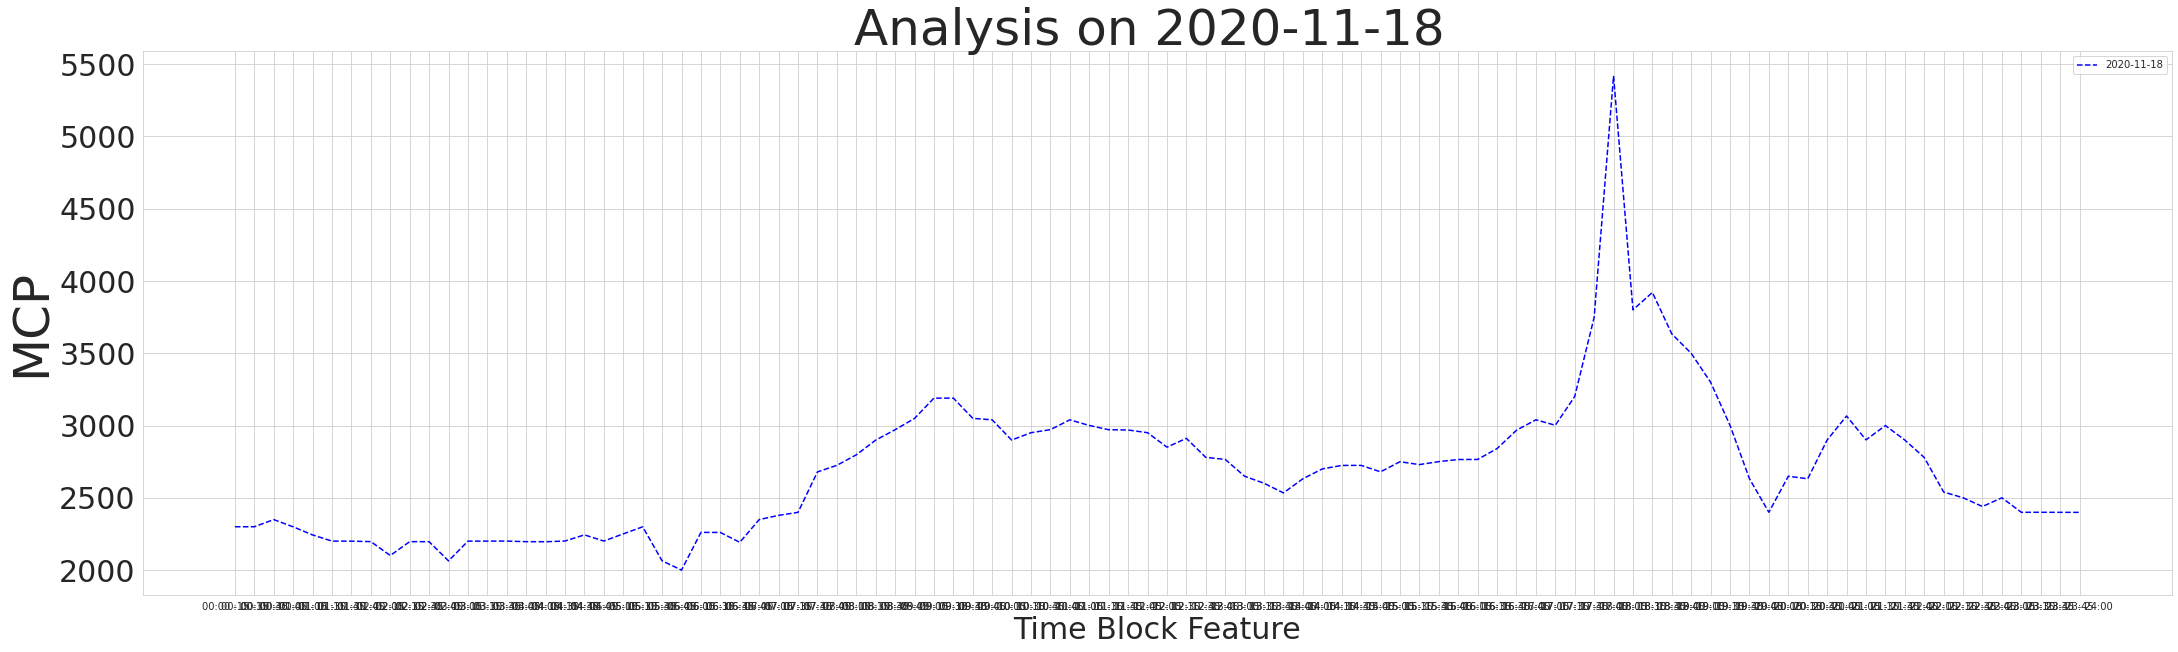

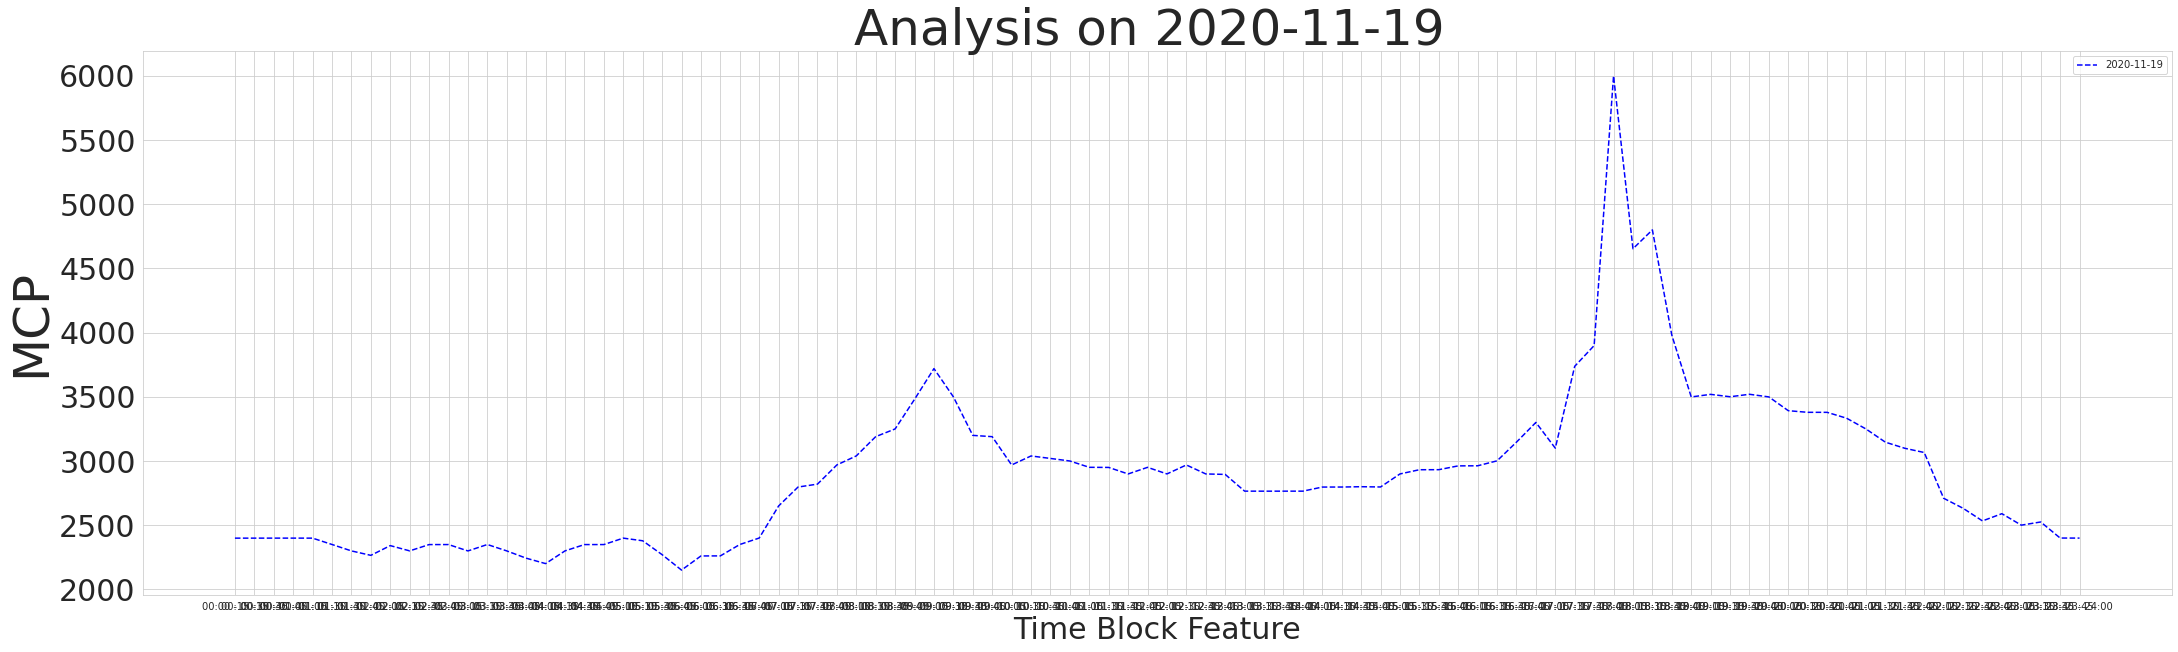

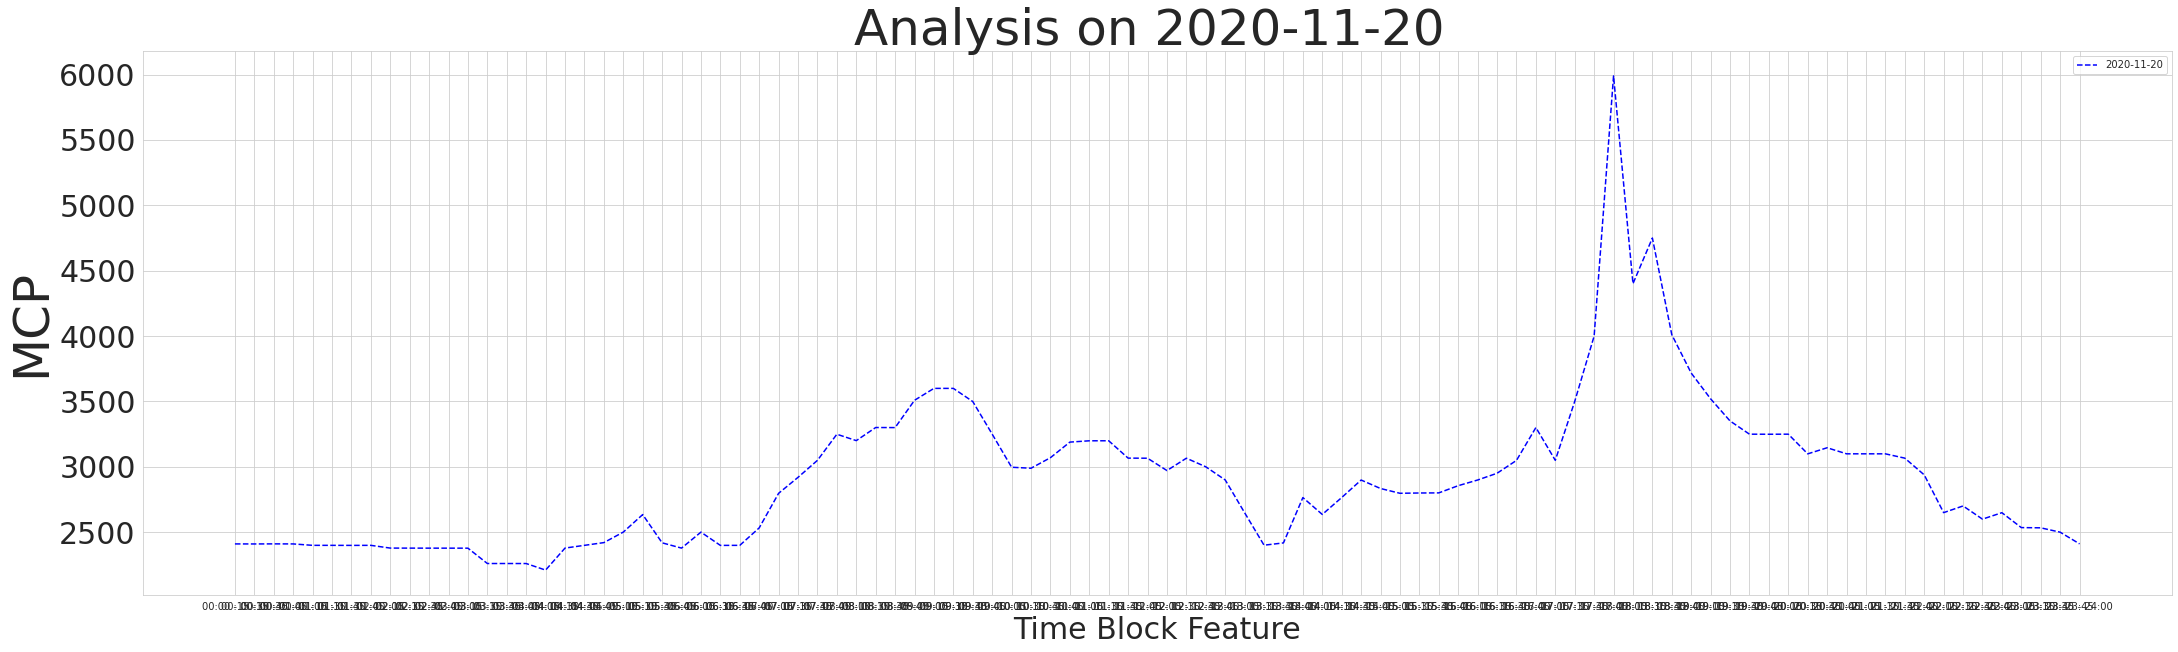

In [112]:
i=0
while i!=8:
  plt.figure(figsize=(80,10))
  
  plt.subplot(1,2,1)
  sns.set_style('whitegrid')
  plt.title("Analysis on {0} ".format(dates[i]),fontsize=50)
  Hour=data.loc[data.date==dates[i],'Time Block']
  MCP=data.loc[data.date==dates[i],'MCP']
 
  plt.plot(Hour,MCP,'b--',label=dates[i])
  plt.xlabel('Time Block Feature',fontsize=30) 
  plt.ylabel('MCP',fontsize=50) 
  plt.yticks(fontsize=30)
  plt.legend(loc=1)
  i=i+1

# Moving Average as Feature Engineering

In [118]:
df=data['MCP']
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)

window = lag3.rolling(window=width)
means = window.mean()

dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = [ 'mean' , 't' , 't+1' ]

In [119]:
dataframe

,mean,t,t+1
0,NaN,NaN,2300.45
1,NaN,2300.45,2399.06
2,NaN,2399.06,2399.32
3,NaN,2399.32,2399.02
4,2366.276667,2399.02,2299.37
...,...,...,...
763,2763.083333,2600.09,2649.32
764,2650.250000,2649.32,2535.38
765,2650.100000,2535.38,2533.62
766,2594.930000,2533.62,2500.33
